In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random
import pickle
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
dest='./data'
Types=['dog','cat']#dog=0, cat=1

## To see which size is good to take as a downscale image. Not to unclear to see.

In [3]:
for types in Types:
    path=os.path.join(dest,types)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

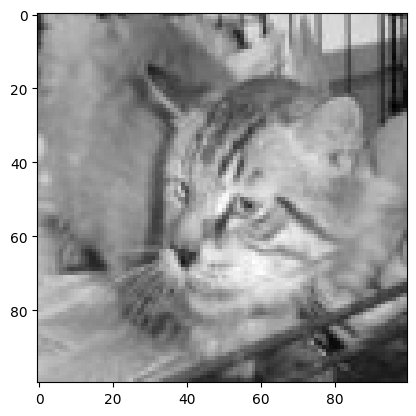

In [4]:
new_array= cv2.resize(img_array, (100, 100))
plt.imshow(new_array, cmap='gray')
plt.show()

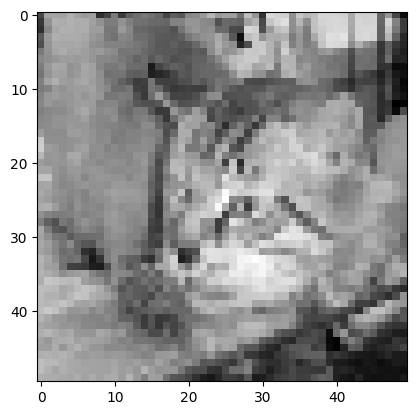

In [5]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

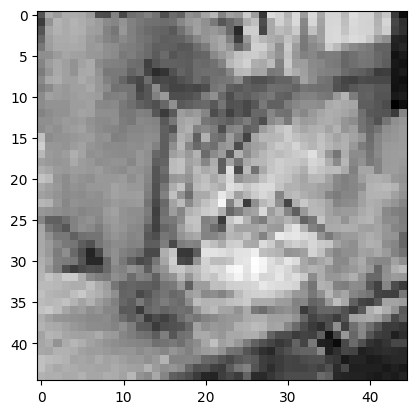

In [6]:
new_array= cv2.resize(img_array, (45, 45))
plt.imshow(new_array, cmap='gray')
plt.show()

## I think 50x50 seems like a good size.
## See if other images looks goog too.

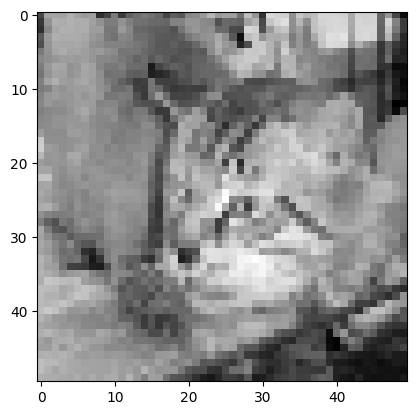

In [7]:
new_array= cv2.resize(img_array, (50, 50))
plt.imshow(new_array, cmap='gray')
plt.show()

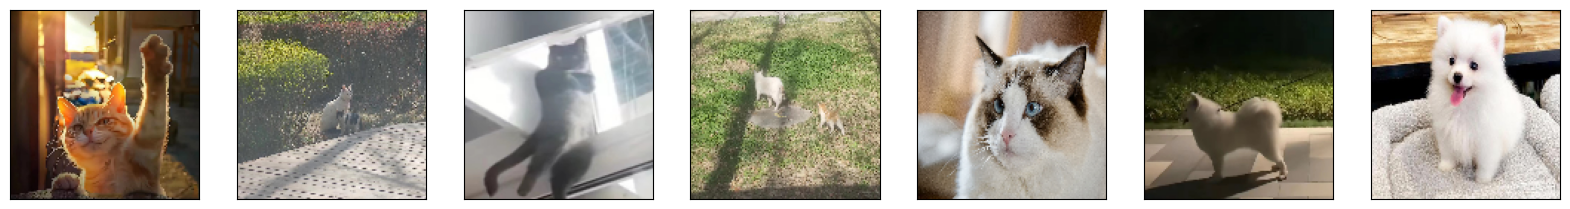

In [8]:
imagepath="./example photo for display./"
fig, axs = plt.subplots(1, 7, figsize=(20, 20))
for x in range(1,8):
    img=plt.imread(imagepath+"photo"+str(x)+".jpg")
    img= cv2.resize(img, (128, 128))
    axs[x-1].imshow(img)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Show the plot
plt.show()

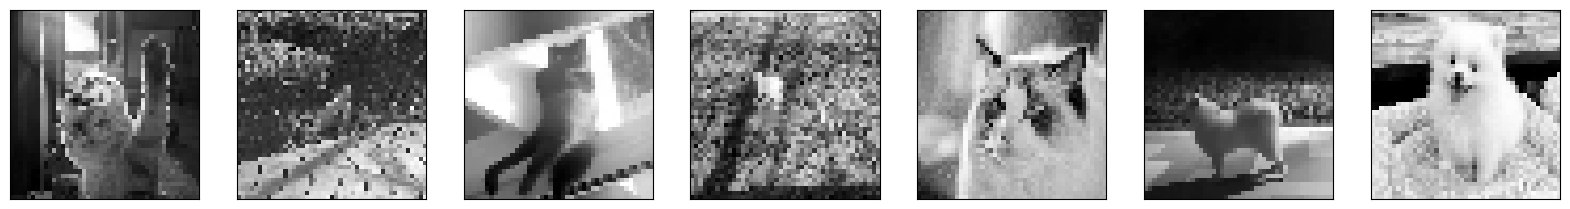

In [9]:
imagepath = "./example photo for display/"
fig, axs = plt.subplots(1, 7, figsize=(20, 20))
for x in range(1, 8):
    img = plt.imread(imagepath + "photo" + str(x) + ".jpg")
    img = cv2.resize(img, (45, 45))
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # convert image to grayscale
    axs[x-1].imshow(img_gray, cmap='gray')

    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

# Show the plot
plt.show()

## Downscaling in some pictures will cause it difficult to see if a picture is cat or dog.
## We expect the model with downscaling to be perform worse in accuracy.
## But not downscaling the images in CNN could cause overfitting and potentially lead to higher validation loss.


## We want to see whether which data input (image) gives the best model

## 1. Original size (128x128) with Greyscale

## 2. Downscale size (50x50) with Greyscale

In [11]:
pickle_out=open("try different input CNN\X_128_C","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("try different input CNN\y_128_C","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 1. Original size (128x128) with Greyscale

45283 45283


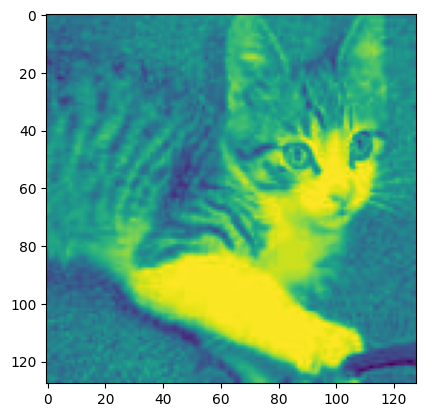

In [12]:
training_data=[]
IMG_SIZE=128
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()
random.shuffle(training_data)
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)
print(len(X),len(y))
plt.imshow(X[0])

In [13]:
y.shape

(45283,)

In [14]:
print(X[0],y[0])

[[[ 83]
  [ 99]
  [112]
  ...
  [117]
  [120]
  [115]]

 [[111]
  [123]
  [125]
  ...
  [113]
  [113]
  [117]]

 [[111]
  [121]
  [117]
  ...
  [121]
  [117]
  [126]]

 ...

 [[132]
  [134]
  [130]
  ...
  [ 99]
  [ 91]
  [106]]

 [[120]
  [138]
  [147]
  ...
  [105]
  [ 94]
  [100]]

 [[116]
  [129]
  [126]
  ...
  [115]
  [111]
  [109]]] 1


In [15]:
pickle_out=open("try different input CNN\X_128_G","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("try different input CNN\y_128_G","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## 2. Downscale size (50x50) with Greyscale

In [19]:
training_data=[]
IMG_SIZE=50
def create_training_data():
    for types in Types:
        path=os.path.join(dest,types)
        class_num=Types.index(types)
        for img in os.listdir(path):
            try:
                img_array =cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except:
                continue

create_training_data()
random.shuffle(training_data)

45283 45283


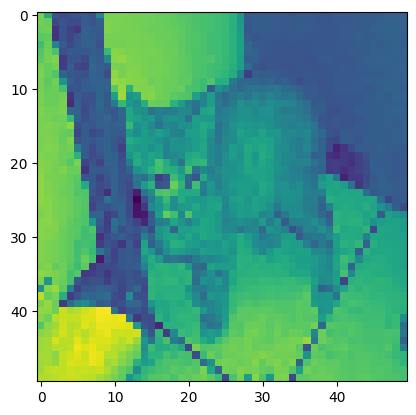

In [20]:
X=[]
y=[]

for features, label in training_data:
    X.append(features)
    y.append(label)

X= np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y= np.array(y)
print(len(X),len(y))
plt.imshow(X[0])

In [21]:
print(X[0],y[0])

[[[203]
  [165]
  [ 92]
  ...
  [100]
  [101]
  [102]]

 [[201]
  [198]
  [ 80]
  ...
  [102]
  [102]
  [102]]

 [[199]
  [200]
  [ 66]
  ...
  [104]
  [103]
  [102]]

 ...

 [[215]
  [217]
  [212]
  ...
  [187]
  [182]
  [173]]

 [[215]
  [224]
  [227]
  ...
  [188]
  [184]
  [184]]

 [[221]
  [221]
  [224]
  ...
  [187]
  [187]
  [184]]] 1


In [22]:
X.shape

(45283, 50, 50, 1)

In [23]:
y.shape

(45283,)

In [24]:
X[0]

array([[[203],
        [165],
        [ 92],
        ...,
        [100],
        [101],
        [102]],

       [[201],
        [198],
        [ 80],
        ...,
        [102],
        [102],
        [102]],

       [[199],
        [200],
        [ 66],
        ...,
        [104],
        [103],
        [102]],

       ...,

       [[215],
        [217],
        [212],
        ...,
        [187],
        [182],
        [173]],

       [[215],
        [224],
        [227],
        ...,
        [188],
        [184],
        [184]],

       [[221],
        [221],
        [224],
        ...,
        [187],
        [187],
        [184]]], dtype=uint8)

In [25]:
y[0]

1

In [26]:
y[0:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [27]:
pickle_out=open("try different input CNN\X_50_G","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("try different input CNN\y_50_G","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## After that the X will be normalise X/255.0.
### 1)Cause lesser time and resources required to train the model.
### 3)Better model accuracy : Reduce the effect of differences in the scale of the input features, which can cause some features to dominate the others.